### 1. NN (kaggle score: 0.98759)
* Linear
* 5 layers

In [0]:
cd /content/drive/My Drive/Colab Notebooks/200318_NN

/content/drive/My Drive/Colab Notebooks/200318_NN


In [1]:
import pandas as pd
import numpy as np

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

!pip install -q tensorflow-gpu==2.0.0-rc1
import tensorflow as tf

     |████████████████████████████████| 380.5MB 48kB/s 
     |████████████████████████████████| 4.3MB 49.2MB/s 
     |████████████████████████████████| 501kB 28.1MB/s 


In [0]:
train = pd.read_csv("train_df.csv")
test = pd.read_csv("test_df.csv")

In [2]:
sample_submission = pd.read_csv("sample_submission.csv")

In [0]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
test.head()

,Unnamed: 0,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,57808,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,4960,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,35755,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,15543,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,48968,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
X = train.iloc[:, 1:].values / 255
y = train.iloc[:, 0].values
X_test = test.iloc[:, 1:].values / 255

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=77)
print(x_train.shape, x_val.shape, y_train.shape, y_val.shape)

(29400, 784) (12600, 784) (29400,) (12600,)


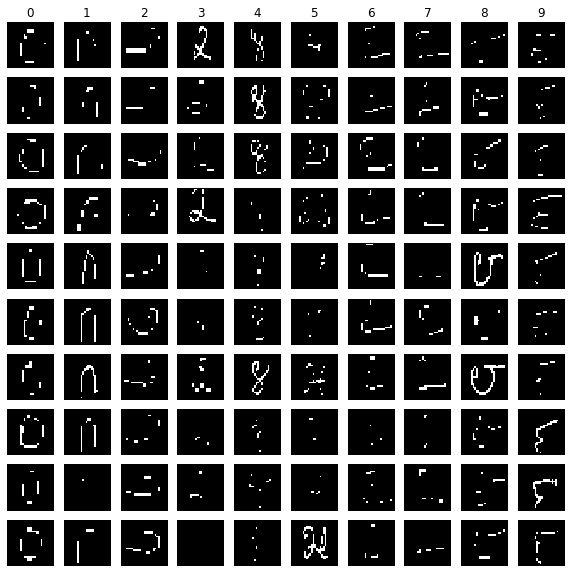

In [0]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=10, ncols=10, figsize=(10,10))

for i in range(10): # Column by column
    num_i = x_train[y_train == i]
    ax[0][i].set_title(i)
    for j in range(10): # Row by row
        ax[j][i].axis('off')
        ax[j][i].imshow(num_i[j, :].astype(np.uint8).reshape(28, 28), cmap='gray')

In [0]:
!pip install keras-rectified-adam

  Created wheel for keras-rectified-adam: filename=keras_rectified_adam-0.17.0-cp36-none-any.whl size=14781 sha256=f79cd1c1d1010d6254bcadb2ffb75bbedb658da24ad237ae9eefc19aa9f49c00
  Stored in directory: /root/.cache/pip/wheels/7b/01/27/3a934e1a5644f5b93c720422a6ef97034ea78a21ba71cfb549
Successfully built keras-rectified-adam


In [0]:
from keras_radam.training import RAdamOptimizer
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [0]:
num_classes = 10
model = tf.keras.Sequential([
        tf.keras.layers.Dense(512, input_shape=(784,)),
        tf.keras.layers.BatchNormalization(momentum=0.5, epsilon=1e-5, gamma_initializer="uniform"),
        tf.keras.layers.LeakyReLU(alpha=0.1),
        tf.keras.layers.Dropout(0.2),

        tf.keras.layers.Dense(256),
        tf.keras.layers.BatchNormalization(momentum=0.5, epsilon=1e-5, gamma_initializer="uniform"),
        tf.keras.layers.LeakyReLU(alpha=0.1),
        tf.keras.layers.Dropout(0.2),

        tf.keras.layers.Dense(128),
        tf.keras.layers.BatchNormalization(momentum=0.5, epsilon=1e-5, gamma_initializer="uniform"),
        tf.keras.layers.LeakyReLU(alpha=0.1),
        tf.keras.layers.Dropout(0.2),

        tf.keras.layers.Dense(64),
        tf.keras.layers.BatchNormalization(momentum=0.5, epsilon=1e-5, gamma_initializer="uniform"),
        tf.keras.layers.LeakyReLU(alpha=0.1),
        tf.keras.layers.Dropout(0.2),

        tf.keras.layers.Dense(32),
        tf.keras.layers.BatchNormalization(momentum=0.5, epsilon=1e-5, gamma_initializer="uniform"),
        tf.keras.layers.LeakyReLU(alpha=0.1),
        tf.keras.layers.Dropout(0.2),

        tf.keras.layers.Dense(num_classes, activation="softmax"),
])

In [0]:
model.compile(optimizer = RAdamOptimizer(learning_rate=1e-4), loss="sparse_categorical_crossentropy", metrics=["acc"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 256)               0

In [0]:
# early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=50) # 조기종료 콜백함수 정의 - 최적 epoch: 200 
history = model.fit(x_train, y_train, epochs=200, batch_size=1024, validation_data=[x_val, y_val], verbose=2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 29400 samples, validate on 12600 samples
Epoch 1/200
29400/29400 - 4s - loss: 2.3035 - acc: 0.1050 - val_loss: 2.3013 - val_acc: 0.1247
Epoch 2/200
29400/29400 - 1s - loss: 2.2998 - acc: 0.1255 - val_loss: 2.2965 - val_acc: 0.2047
Epoch 3/200
29400/29400 - 1s - loss: 2.2934 - acc: 0.1675 - val_loss: 2.2898 - val_acc: 0.3443
Epoch 4/200
29400/29400 - 1s - loss: 2.2855 - acc: 0.2297 - val_loss: 2.2808 - val_acc: 0.4944
Epoch 5/200
29400/29400 - 1s - loss: 2.2767 - acc: 0.3086 - val_loss: 2.2712 - val_acc: 0.6060
Epoch 6/200
29400/29400 - 1s - loss: 2.2667 - acc: 0.3896 - val_loss: 2.2595 - val_acc: 0.6902
Epoch 7/200
29400/29400 - 1s - loss: 2.2573 - acc: 0.4572 - val_loss: 2.2480 - val_acc: 0.7525
Epoch 8/200
29400/29400 - 1s - loss: 2.2462 - acc: 0.5265 - val_loss: 2.2358 - val_acc: 0.8040
Epoch 9/200
29400/29400 - 1s - loss: 2.2351 - acc: 0.5876 - val_loss: 2.2221 - val_acc: 0.8316
E

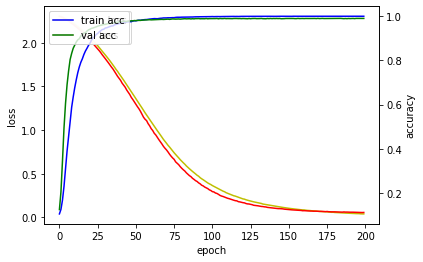

In [0]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [0]:
prediction1 = model.predict(X_test)

### 2. NN 
* linear
* 6 layers
* weight initialization

In [0]:
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=22)
print(x_train.shape, x_val.shape, y_train.shape, y_val.shape)

(29400, 784) (12600, 784) (29400,) (12600,)


In [0]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

In [0]:
num_classes = 10
model = tf.keras.Sequential([
        tf.keras.layers.Dense(1024, input_shape=(784,), kernel_initializer='he_normal'),
        tf.keras.layers.BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_initializer="uniform"),
        tf.keras.layers.LeakyReLU(alpha=0.1),
        tf.keras.layers.Dropout(0.25),

        tf.keras.layers.Dense(512, kernel_initializer='he_normal'),
        tf.keras.layers.BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_initializer="uniform"),
        tf.keras.layers.LeakyReLU(alpha=0.1),
        tf.keras.layers.Dropout(0.25),

        tf.keras.layers.Dense(256, kernel_initializer='he_normal'),
        tf.keras.layers.BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_initializer="uniform"),
        tf.keras.layers.LeakyReLU(alpha=0.1),
        tf.keras.layers.Dropout(0.25),

        tf.keras.layers.Dense(128, kernel_initializer='he_normal'),
        tf.keras.layers.BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_initializer="uniform"),
        tf.keras.layers.LeakyReLU(alpha=0.1),
        tf.keras.layers.Dropout(0.25),

        tf.keras.layers.Dense(64, kernel_initializer='he_normal'),
        tf.keras.layers.BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_initializer="uniform"),
        tf.keras.layers.LeakyReLU(alpha=0.1),
        tf.keras.layers.Dropout(0.25),

        tf.keras.layers.Dense(32, kernel_initializer='he_normal'),
        tf.keras.layers.BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_initializer="uniform"),
        tf.keras.layers.LeakyReLU(alpha=0.1),
        tf.keras.layers.Dropout(0.25),

        tf.keras.layers.Dense(num_classes, activation="softmax"),
])

In [0]:
model.compile(optimizer = RAdamOptimizer(learning_rate=1e-4), loss="sparse_categorical_crossentropy", metrics=["acc"])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 1024)              803840    
_________________________________________________________________
batch_normalization_20 (Batc (None, 1024)              4096      
_________________________________________________________________
leaky_re_lu_20 (LeakyReLU)   (None, 1024)              0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_25 (Dense)             (None, 512)               524800    
_________________________________________________________________
batch_normalization_21 (Batc (None, 512)               2048      
_________________________________________________________________
leaky_re_lu_21 (LeakyReLU)   (None, 512)              

In [0]:
filename = 'checkpoint-epoch-{}-batch-{}-trial-001.h5'.format(3000, 1024)
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50, restore_best_weights=True)

In [0]:
history = model.fit(x_train, y_train, epochs=3000, batch_size=3000, validation_data=[x_val, y_val], 
                    callbacks = [checkpoint, early_stopping], verbose=2)

Train on 29400 samples, validate on 12600 samples
Epoch 1/3000

Epoch 00001: val_loss improved from inf to 2.30259, saving model to checkpoint-epoch-3000-batch-1024-trial-001.h5
29400/29400 - 3s - loss: 2.3014 - acc: 0.1126 - val_loss: 2.3026 - val_acc: 0.1002
Epoch 2/3000

Epoch 00002: val_loss did not improve from 2.30259
29400/29400 - 1s - loss: 2.3007 - acc: 0.1177 - val_loss: 2.3026 - val_acc: 0.1002
Epoch 3/3000

Epoch 00003: val_loss did not improve from 2.30259
29400/29400 - 1s - loss: 2.3000 - acc: 0.1206 - val_loss: 2.3026 - val_acc: 0.1002
Epoch 4/3000

Epoch 00004: val_loss improved from 2.30259 to 2.30258, saving model to checkpoint-epoch-3000-batch-1024-trial-001.h5
29400/29400 - 1s - loss: 2.2986 - acc: 0.1342 - val_loss: 2.3026 - val_acc: 0.1002
Epoch 5/3000

Epoch 00005: val_loss improved from 2.30258 to 2.30253, saving model to checkpoint-epoch-3000-batch-1024-trial-001.h5
29400/29400 - 1s - loss: 2.2971 - acc: 0.1472 - val_loss: 2.3025 - val_acc: 0.1002
Epoch 6/3000


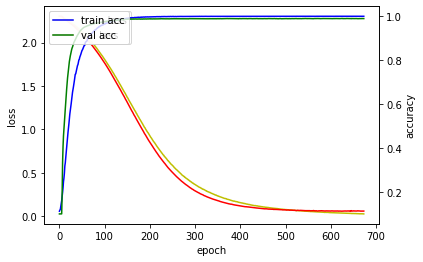

In [0]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [0]:
pred = model.predict_classes(X_test)
sample_submission["Category"] = pd.Series(pred)
sample_submission.head()

,Id,Category
0,57808,8
1,4960,0
2,35755,5
3,15543,3
4,48968,8


In [0]:
sample_submission.to_csv("keras4.csv", index=False)

In [0]:
prediction2 = model.predict(X_test)

### 3. Ensemble (kaggle score: 0.98814)

In [0]:
final_pred = (prediction1 + prediction2)/2
final_pred = np.argmax(final_pred, axis=1)

In [0]:
sample_submission["Category"] = pd.Series(final_pred)
sample_submission.head()

,Id,Category
0,57808,8
1,4960,0
2,35755,5
3,15543,3
4,48968,8


In [0]:
sample_submission.to_csv("keras5.csv", index=False)

### 4. CNN 
* optimizer RMSprop - (kaggle score: 0.99814)
* optimizer RAdamOptimizer - (kaggle score: 0.99592)

In [0]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=111)
print(x_train.shape, x_val.shape, y_train.shape, y_val.shape)

(29400, 784) (12600, 784) (29400,) (12600,)


In [0]:
x_train = x_train.reshape(-1, 28, 28,1)
x_val = x_val.reshape(-1, 28, 28,1)
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)

In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), padding='same', input_shape=(28, 28, 1)),
    tf.keras.layers.BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_initializer="uniform"),
    tf.keras.layers.LeakyReLU(alpha=0.1),
    tf.keras.layers.Conv2D(64,  (3,3), padding='same'),
    tf.keras.layers.BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_initializer="uniform"),
    tf.keras.layers.LeakyReLU(alpha=0.1),
    tf.keras.layers.Conv2D(64,  (3,3), padding='same'),
    tf.keras.layers.BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_initializer="uniform"),
    tf.keras.layers.LeakyReLU(alpha=0.1),

    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Conv2D(128, (3,3), padding='same'),
    tf.keras.layers.BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_initializer="uniform"),
    tf.keras.layers.LeakyReLU(alpha=0.1),
    tf.keras.layers.Conv2D(128, (3,3), padding='same'),
    tf.keras.layers.BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_initializer="uniform"),
    tf.keras.layers.LeakyReLU(alpha=0.1),
    tf.keras.layers.Conv2D(128, (3,3), padding='same'),
    tf.keras.layers.BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_initializer="uniform"),
    tf.keras.layers.LeakyReLU(alpha=0.1),
    
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),    
    
    tf.keras.layers.Conv2D(256, (3,3), padding='same'),
    tf.keras.layers.BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_initializer="uniform"),
    tf.keras.layers.LeakyReLU(alpha=0.1),
    tf.keras.layers.Conv2D(256, (3,3), padding='same'),
    tf.keras.layers.BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_initializer="uniform"),##
    tf.keras.layers.LeakyReLU(alpha=0.1),

    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256),
    tf.keras.layers.LeakyReLU(alpha=0.1),
 
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [0]:
optimizer = RMSprop(learning_rate=0.002, rho=0.9, momentum=0.1, epsilon=1e-07, centered=True, name='RMSprop')

In [0]:
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [0]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
batch_normalization_35 (Batc (None, 28, 28, 64)        256       
_________________________________________________________________
leaky_re_lu_35 (LeakyReLU)   (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
batch_normalization_36 (Batc (None, 28, 28, 64)        256       
_________________________________________________________________
leaky_re_lu_36 (LeakyReLU)   (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 28, 28, 64)       

In [0]:
batch_size = 1024
num_classes = 10
epochs = 40

In [0]:
datagen_train = ImageDataGenerator(rotation_range = 10,
                                   width_shift_range = 0.25,
                                   height_shift_range = 0.25,
                                   shear_range = 0.1,
                                   zoom_range = 0.4,
                                   horizontal_flip = False)

datagen_val = ImageDataGenerator() 


step_train = x_train.shape[0] // batch_size
step_val = x_val.shape[0] // batch_size

learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau( 
    monitor='loss', factor=0.25,  patience=2, verbose=1, mode="auto", min_delta=0.0001, cooldown=0, min_lr=0.00001)

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5, restore_best_weights=True)

In [0]:
history = model.fit_generator(datagen_train.flow(x_train, y_train, batch_size=batch_size),
                              steps_per_epoch=len(x_train)//batch_size,
                              epochs=epochs,
                              validation_data=(x_val, y_val),
                              validation_steps=50,
                              callbacks=[learning_rate_reduction, es],
                              verbose=2)

Epoch 1/40
28/28 - 26s - loss: 1.5903 - accuracy: 0.4596 - val_loss: 2.3164 - val_accuracy: 0.1000
Epoch 2/40
28/28 - 25s - loss: 0.5435 - accuracy: 0.8202 - val_loss: 2.3035 - val_accuracy: 0.1000
Epoch 3/40
28/28 - 25s - loss: 0.2715 - accuracy: 0.9118 - val_loss: 1.4072 - val_accuracy: 0.6307
Epoch 4/40
28/28 - 25s - loss: 0.1978 - accuracy: 0.9348 - val_loss: 0.6192 - val_accuracy: 0.8713
Epoch 5/40
28/28 - 25s - loss: 0.1466 - accuracy: 0.9531 - val_loss: 0.4878 - val_accuracy: 0.9384
Epoch 6/40
28/28 - 25s - loss: 0.1371 - accuracy: 0.9539 - val_loss: 0.3570 - val_accuracy: 0.9818
Epoch 7/40
28/28 - 25s - loss: 0.1156 - accuracy: 0.9616 - val_loss: 0.2734 - val_accuracy: 0.9848
Epoch 8/40
28/28 - 25s - loss: 0.1364 - accuracy: 0.9547 - val_loss: 0.1765 - val_accuracy: 0.9877
Epoch 9/40
28/28 - 25s - loss: 0.0964 - accuracy: 0.9680 - val_loss: 0.4547 - val_accuracy: 0.8502
Epoch 10/40
28/28 - 25s - loss: 0.0935 - accuracy: 0.9681 - val_loss: 0.0737 - val_accuracy: 0.9920
Epoch 11/

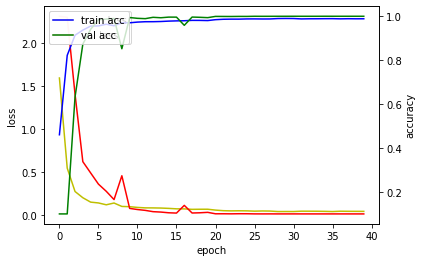

In [0]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['accuracy'], 'b', label='train acc')
acc_ax.plot(history.history['val_accuracy'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [0]:
test=X_test.reshape(-1,28,28,1)

In [0]:
prediction3 = model.predict(test)

In [0]:
pred = model.predict_classes(test)
sample_submission["Category"] = pd.Series(pred)
sample_submission.head()

,Id,Category
0,57808,8
1,4960,0
2,35755,5
3,15543,3
4,48968,8


In [0]:
sample_submission.to_csv("keras6.csv", index=False)

### Ensemble
* Linear + CNN - (kaggle score: 0.99092)

In [0]:
final_pred = (prediction1 + prediction2 + prediction3)/3
final_pred = np.argmax(final_pred, axis=1)

In [0]:
sample_submission["Category"] = pd.Series(final_pred)
sample_submission.head()

,Id,Category
0,57808,8
1,4960,0
2,35755,5
3,15543,3
4,48968,8


In [0]:
sample_submission.to_csv("keras7.csv", index=False)

### Ensemble - Hard Voting (kaggle score: 0.99740)

In [3]:
keras5 = pd.read_csv("keras5.csv") # Linear - (kaggle score: 0.98814)
keras6 = pd.read_csv("keras6.csv") # CNN: RMSprop - (kaggle score: 0.99814)
keras7 = pd.read_csv("keras7.csv") # Linear + CNN - (kaggle score: 0.99092)
keras8 = pd.read_csv("keras8.csv") # CNN: RAdamOptimizer - (kaggle score: 0.99592)

In [4]:
x1 = keras5["Category"]
x2 = keras6["Category"]
x3 = keras7["Category"]
x4 = keras8["Category"]

In [5]:
k = []
for a,b,c,d in zip(x1,x2,x3,x4): 
    if not (a==b==c==d):
        k.append(np.argmax(np.bincount([a,b,c,d], weights=[0.15,0.4,0.15,0.3]))) # 가장 잘 나온 예측값에 큰 가중치 부여  
    else: 
        k.append(b)

In [6]:
sample_submission["Category"] = pd.Series(k)
sample_submission.head()

,Id,Category
0,57808,8
1,4960,0
2,35755,5
3,15543,3
4,48968,8


In [7]:
sample_submission.to_csv("keras9.csv", index=False)